In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house_prices.csv')
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1460 non-null   int64  
 1   Dwell_Type           1460 non-null   int64  
 2   Zone_Class           1460 non-null   object 
 3   LotFrontage          1201 non-null   float64
 4   LotArea              1460 non-null   int64  
 5   Road_Type            1460 non-null   object 
 6   Alley                91 non-null     object 
 7   Property_Shape       1460 non-null   object 
 8   LandContour          1460 non-null   object 
 9   Utilities            1460 non-null   object 
 10  LotConfig            1460 non-null   object 
 11  LandSlope            1460 non-null   object 
 12  Neighborhood         1460 non-null   object 
 13  Condition1           1460 non-null   object 
 14  Condition2           1460 non-null   object 
 15  Dwelling_Type        1460 non-null   o

In [4]:
df.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
missing_values = df.isna().sum()

In [6]:
nulls = df.isna().sum()
nulls[nulls > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [7]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.head()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
df_numeric.corr()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
Dwell_Type,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [9]:
corr_matrix = df_numeric.corr().abs()

# Flatten the matrix and remove diagonal part
corr_series = corr_matrix.unstack().sort_values(ascending=False)
corr_series = corr_series[corr_series != 1]

# Get the top 5 correlated features
top_40_correlated = corr_series.head(40)

# Output the feature names and their correlations
print(top_40_correlated.drop_duplicates())

GarageArea           GarageCars             0.882475
GarageYrBlt          YearBuilt              0.825667
GrLivArea            TotRmsAbvGrd           0.825489
TotalBsmtSF          1stFlrSF               0.819530
OverallQual          Property_Sale_Price    0.790982
Property_Sale_Price  GrLivArea              0.708624
2ndFlrSF             GrLivArea              0.687501
TotRmsAbvGrd         BedroomAbvGr           0.676620
BsmtFullBath         BsmtFinSF1             0.649212
YearRemodAdd         GarageYrBlt            0.642277
Property_Sale_Price  GarageCars             0.640409
GrLivArea            FullBath               0.630012
GarageArea           Property_Sale_Price    0.623431
TotRmsAbvGrd         2ndFlrSF               0.616423
TotalBsmtSF          Property_Sale_Price    0.613581
HalfBath             2ndFlrSF               0.609707
1stFlrSF             Property_Sale_Price    0.605852
OverallQual          GarageCars             0.600671
GrLivArea            OverallQual            0.

In [10]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
df=df.drop(['Alley','PoolQC','Fence','MiscFeature','Id'],axis=1)

In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

,0
Dwell_Type,0.000000
Zone_Class,0.000000
LotFrontage,17.739726
LotArea,0.000000
Road_Type,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


In [13]:
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing = missing_df[missing_df['Percentage'] > 0]
missing = missing.sort_values(by='Percentage', ascending=False)

In [14]:
missing

,Missing Values,Percentage
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740


In [15]:
missing = missing.rename_axis('Feature')
missing.head()

,Missing Values,Percentage
Feature,,
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageFinish,81,5.547945


In [16]:
missing.shape

(15, 2)

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

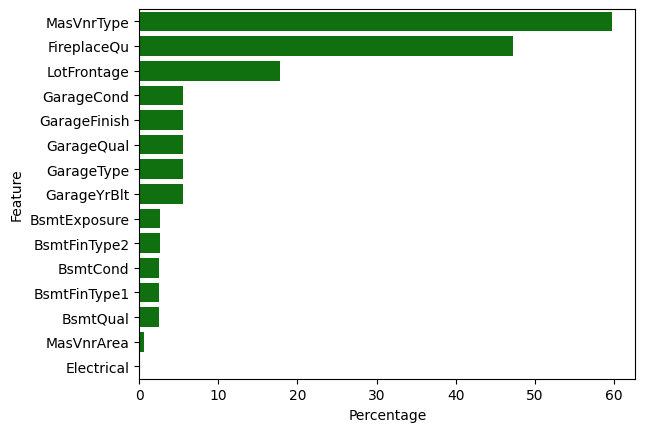

In [17]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')

plt.xticks()

(1.0, 0.0)

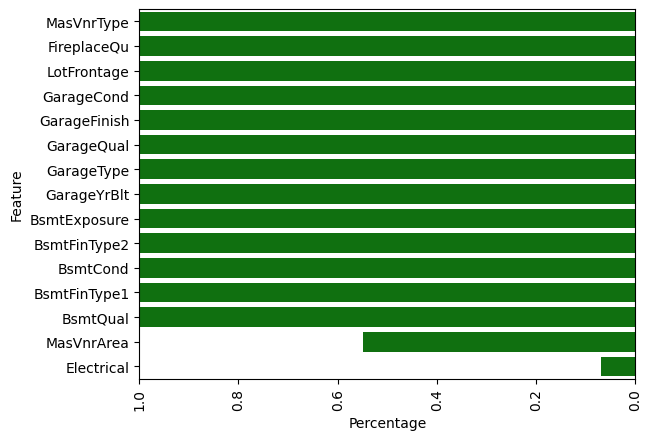

In [18]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')
plt.xticks(rotation=90)
# Set 1% Threshold
plt.xlim(1, 0)

In [19]:
def column_info(df):
    cols=[]
    dtypes=[]
    uniques=[]
    nuniques=[]
    nulls=[]
    null_per=[]
    for col in df.columns:
        cols.append(col)
        dtypes.append(df[col].dtype)
        uniques.append(df[col].unique())
        nuniques.append(df[col].nunique())
        nulls.append(df[col].isna().sum())
        null_per.append((df[col].isna().sum())/len(df))

    return pd.DataFrame({'col':cols,'dtype':dtypes,'unique':uniques,'nunique':nuniques,'null_per':null_per})

In [20]:
from sklearn.impute import SimpleImputer

for col in df.columns:
    if df[col].dtype=='object':

        imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
        df[col]=imputer.fit_transform(df[col].values.reshape(-1,1)).flatten()

    else:
        imputer=SimpleImputer(missing_values=np.nan,strategy='median')
        df[col]=imputer.fit_transform(df[col].values.reshape(-1,1)).flatten()

In [21]:
column_info(df)

,col,dtype,unique,nunique,null_per
0,Dwell_Type,float64,"[60.0, 20.0, 70.0, 50.0, 190.0, 45.0, 90.0, 12...",15,0.0
1,Zone_Class,object,"[RL, RM, C (all), FV, RH]",5,0.0
2,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 69....",110,0.0
3,LotArea,float64,"[8450.0, 9600.0, 11250.0, 9550.0, 14260.0, 141...",1073,0.0
4,Road_Type,object,"[Pave, Grvl]",2,0.0
...,...,...,...,...,...
71,MoSold,float64,"[2.0, 5.0, 9.0, 12.0, 10.0, 8.0, 11.0, 4.0, 1....",12,0.0
72,YrSold,float64,"[2008.0, 2007.0, 2006.0, 2009.0, 2010.0]",5,0.0
73,SaleType,object,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...",9,0.0
74,SaleCondition,object,"[Normal, Abnorml, Partial, AdjLand, Alloca, Fa...",6,0.0


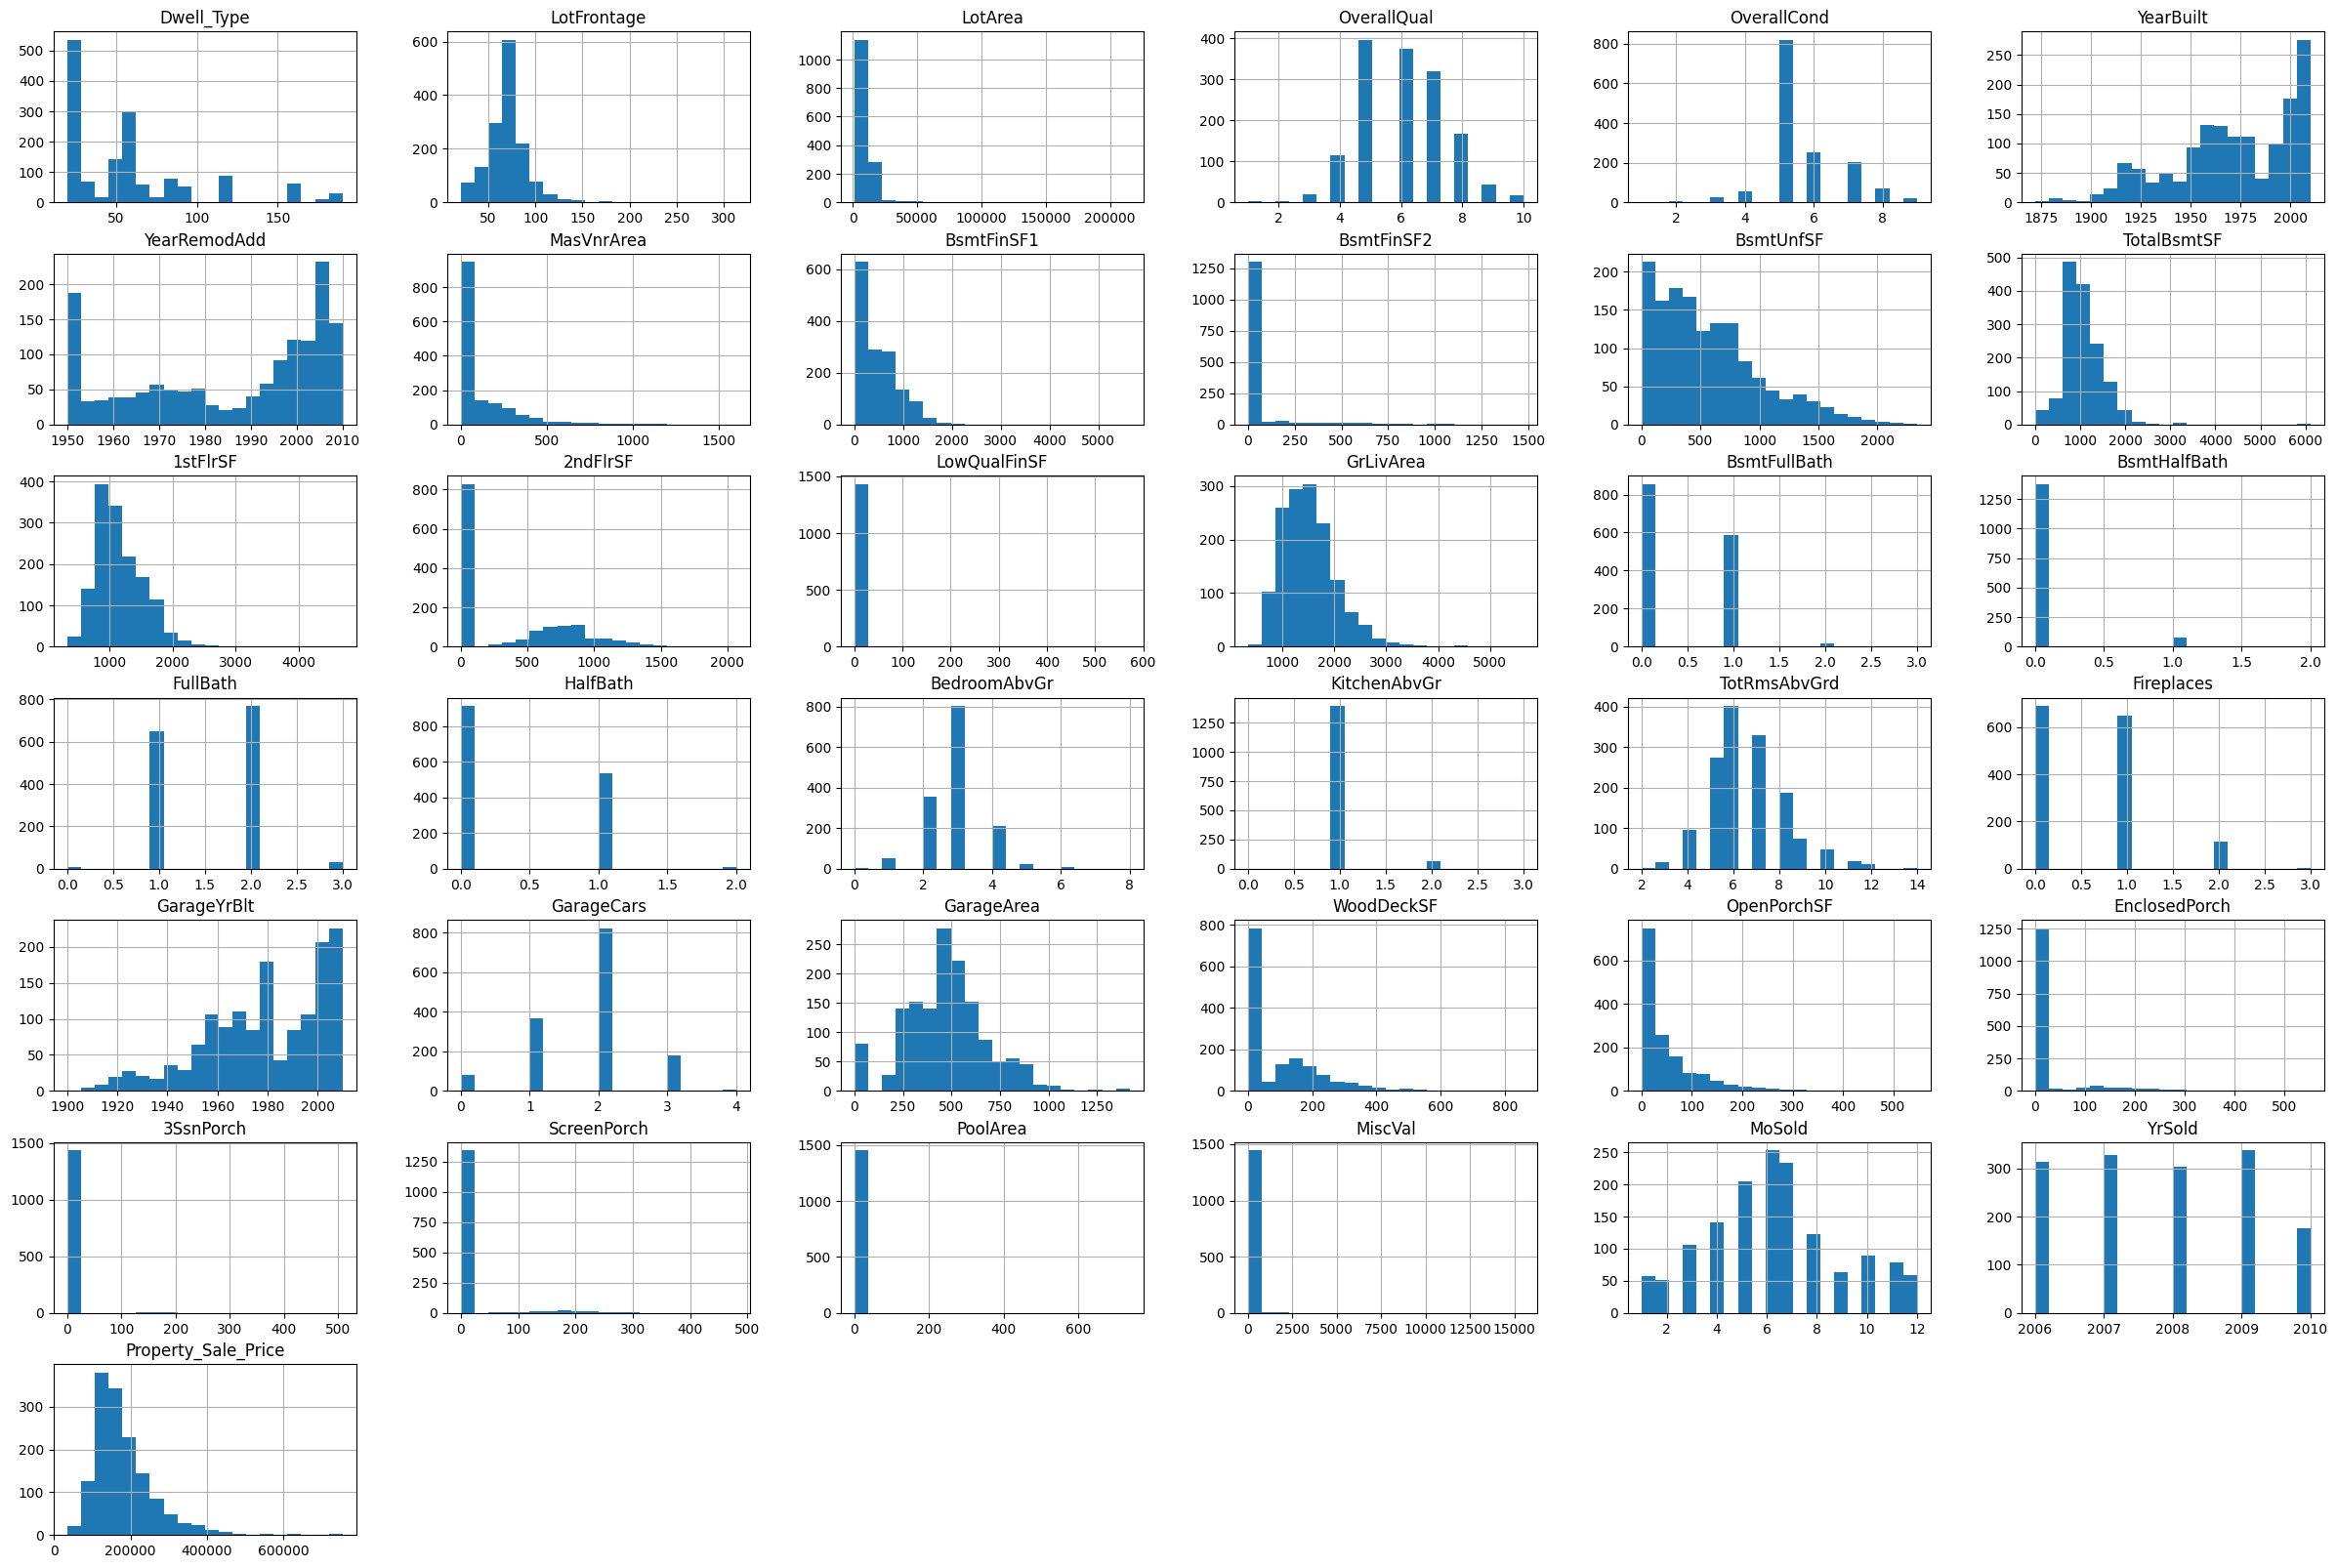

In [22]:
df.hist(bins=20, figsize=(30,20))
plt.show()

<Axes: xlabel='Property_Sale_Price', ylabel='Density'>

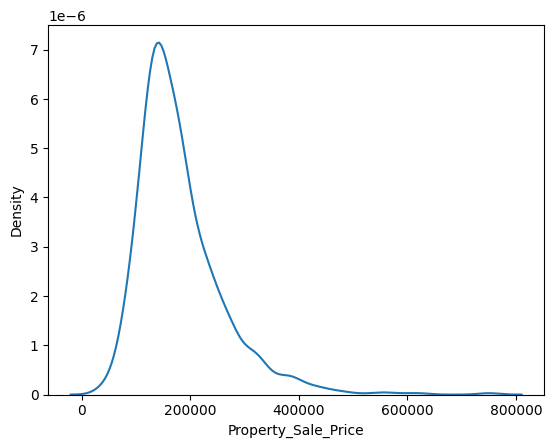

In [23]:
sns.kdeplot(df['Property_Sale_Price'])

In [24]:
dfisna = df.isna().sum()
dfisna[dfisna > 0]

,0


In [25]:
df.isnull().sum()

,0
Dwell_Type,0
Zone_Class,0
LotFrontage,0
LotArea,0
Road_Type,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0
